# Reconocimiento Facial

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_lfw_people
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

sns.set()

In [2]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [3]:
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


In [4]:
print(faces.images.shape)

(1348, 62, 47)


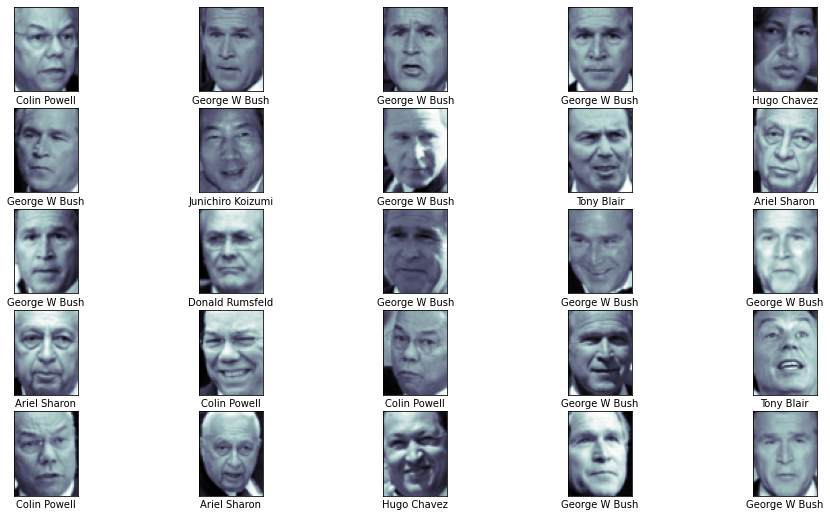

In [9]:
fig, ax = plt.subplots(5,5,figsize=(16,9))
for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(faces.images[i],cmap="bone")
    ax_i.set(xticks=[],yticks=[],xlabel=faces.target_names[faces.target[i]])

In [10]:
62*47

2914

In [16]:
pca = RandomizedPCA(n_components=150,whiten=True,random_state=42)
svc = SVC(kernel="rbf",class_weight="balanced")
model = make_pipeline(pca,svc)

In [18]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(faces.data, faces.target, random_state = 42)

In [30]:
param_grid = {
    "svc__C":[6,6.5,7,7.5,8],
    "svc__gamma":[0.0005,0.001,0.005]
}
grid = GridSearchCV(model,param_grid)

%time grid.fit(Xtrain,Ytrain)

Wall time: 1min 19s


GridSearchCV(estimator=Pipeline(steps=[('pca',
                                        PCA(n_components=150, random_state=42,
                                            whiten=True)),
                                       ('svc', SVC(class_weight='balanced'))]),
             param_grid={'svc__C': [6, 6.5, 7, 7.5, 8],
                         'svc__gamma': [0.0005, 0.001, 0.005]})

In [31]:
print(grid.best_params_)

{'svc__C': 7, 'svc__gamma': 0.001}


In [32]:
classifier = grid.best_estimator_
yfit = classifier.predict(Xtest)

Text(0.5, 0.98, 'Predicciones de las imágenes (incorrectas en rojo)')

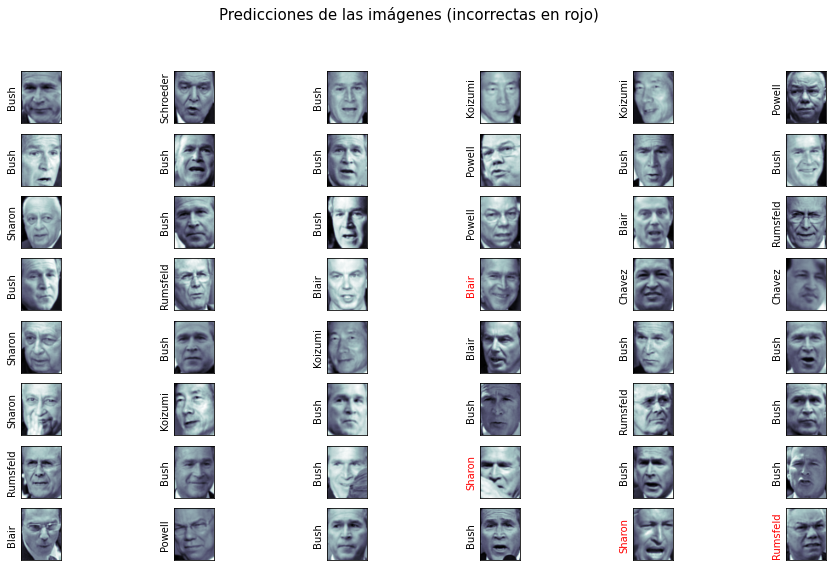

In [33]:
fig, ax = plt.subplots(8,6,figsize=(16,9))

for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(Xtest[i].reshape(62,47), cmap="bone")
    ax_i.set(xticks=[],yticks=[])
    ax_i.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                    color="black" if yfit[i] == Ytest[i] else "red")
fig.suptitle("Predicciones de las imágenes (incorrectas en rojo)", size = 15)

In [38]:
print(classification_report(Ytest,yfit,target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.68      0.87      0.76        15
     Colin Powell       0.85      0.88      0.86        68
  Donald Rumsfeld       0.76      0.84      0.80        31
    George W Bush       0.95      0.84      0.89       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.88      0.70      0.78        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.87      0.98      0.92        42

         accuracy                           0.86       337
        macro avg       0.83      0.87      0.84       337
     weighted avg       0.87      0.86      0.86       337



In [40]:
mat = confusion_matrix(Ytest,yfit)
mat

array([[ 13,   0,   2,   0,   0,   0,   0,   0],
       [  2,  60,   2,   3,   0,   0,   0,   1],
       [  1,   2,  26,   0,   1,   0,   0,   1],
       [  2,   8,   3, 106,   3,   2,   1,   1],
       [  0,   0,   1,   0,  19,   0,   1,   2],
       [  1,   1,   0,   1,   2,  14,   0,   1],
       [  0,   0,   0,   0,   0,   0,  12,   0],
       [  0,   0,   0,   1,   0,   0,   0,  41]], dtype=int64)

<AxesSubplot:>

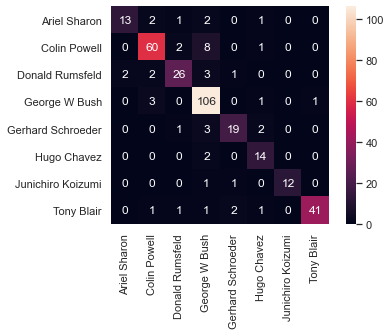

In [45]:
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=True,
            xticklabels=faces.target_names,yticklabels=faces.target_names)